In [1]:
%matplotlib widget

In [2]:
#NOTES - need sudo apt install  m-super dvipng
# for tex to work in labels
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt, pow
import numpy as np
from ipywidgets import interact, FloatSlider, Layout
import IPython
import ipympl

mpl.rcParams['text.usetex'] = True

In [3]:
D=7.7
r=np.linspace(0,D/2,30)
r

array([0.        , 0.13275862, 0.26551724, 0.39827586, 0.53103448,
       0.6637931 , 0.79655172, 0.92931034, 1.06206897, 1.19482759,
       1.32758621, 1.46034483, 1.59310345, 1.72586207, 1.85862069,
       1.99137931, 2.12413793, 2.25689655, 2.38965517, 2.52241379,
       2.65517241, 2.78793103, 2.92068966, 3.05344828, 3.1862069 ,
       3.31896552, 3.45172414, 3.58448276, 3.71724138, 3.85      ])

In [4]:
mpl.get_cachedir()


'/home/dhuffman/.cache/matplotlib'

dp2:59.290000000000006 dp4:3515.3041000000003


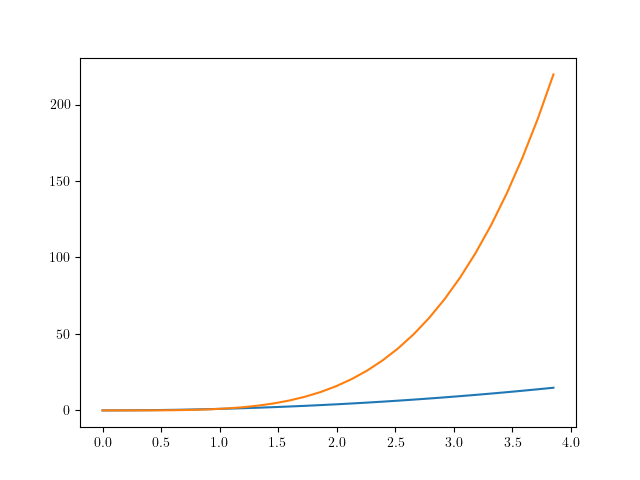

In [5]:
rp2= np.power(r,2)
rp4= np.power(r,4)
dp2= np.power(D,2)
dp4= np.power(D,4)
plt.plot(r,rp2,r,rp4)
print(f'dp2:{dp2} dp4:{dp4}')

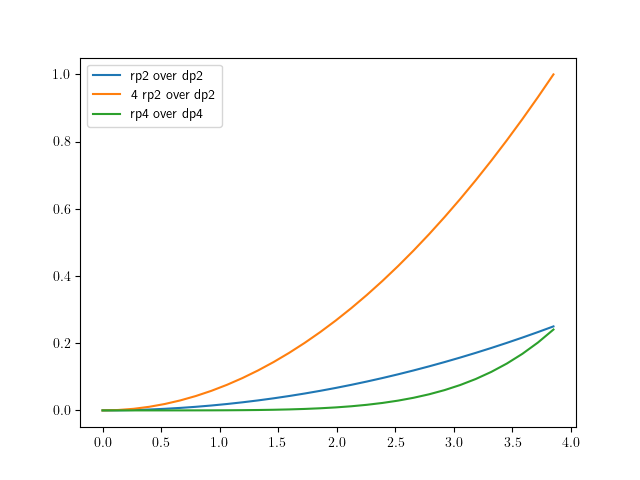

In [6]:
plt.close()

rp2Odp2= rp2/dp2
plt.plot(r,  rp2Odp2,label='rp2 over dp2')
plt.plot(r,4*rp2Odp2,label='4 rp2 over dp2')
rp4Odp4= rp4/dp4
plt.plot(r,r*rp4Odp4,label='rp4 over dp4')
plt.legend()

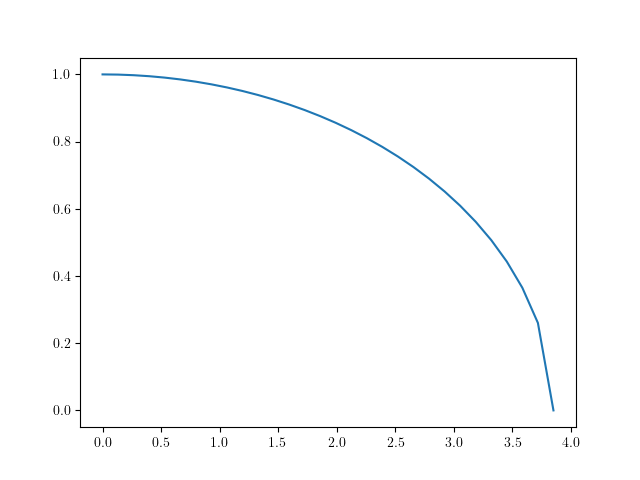

In [7]:
plt.close()

s=np.sqrt(1-4*rp2Odp2)
plt.plot(r,s,label='sqrt')

interactive(children=(FloatSlider(value=0.2, description='a0', max=13.2, min=-13.2, step=0.01), FloatSlider(va…

<function __main__.bicon_update(a0=0.02, a1=1.54, a2=2.2)>

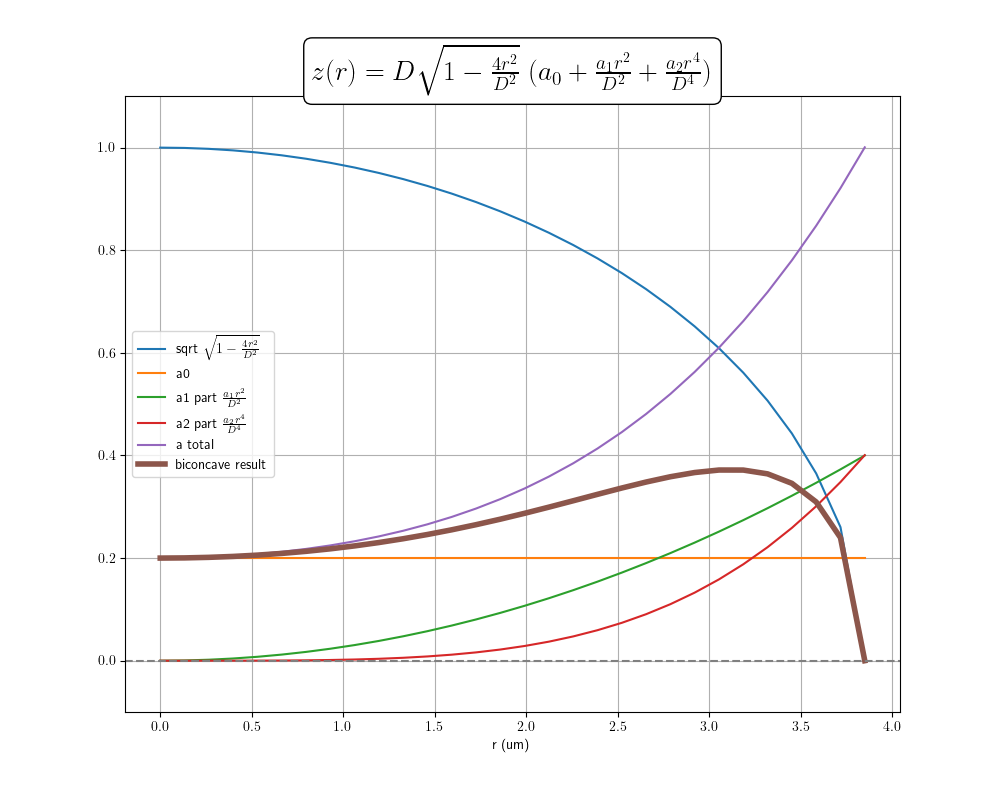

In [8]:
plt.close()

fig, axs = plt.subplots(figsize=[10,8])

axs=[axs,None]

plotkeys= ['a0','a1','a2','atot','s','bi']
bicalcs={}
bilines={}

def bicon_calcs(a0=0.02,a1=1.54,a2=2.2):
    bicalcs['a0'] =a0 * np.ones(len(r))
    bicalcs['a1'] =a1 * rp2Odp2
    bicalcs['a2'] =a2 * rp4Odp4

    bicalcs['atot'] = bicalcs['a0'] + bicalcs['a1'] + bicalcs['a2']
    bicalcs['s']    = np.sqrt(1-4*rp2Odp2)
    
    bicalcs['bi']   = bicalcs['s']*bicalcs['atot']
    #print('calcs out')
    bicalcs['maxy'] = max([max(bicalcs[k]) for k in plotkeys])
    bicalcs['miny'] = min([min(bicalcs[k]) for k in plotkeys])
    
    
def bicon_plot():
    bilines['s'   ], = axs[0].plot(r, bicalcs['s']    ,label=r'sqrt $\sqrt{1-\frac{4r^2}{D^2}}$' )
    bilines['a0'  ], = axs[0].plot(r, bicalcs['a0']   ,label='a0'   )
    bilines['a1'  ], = axs[0].plot(r, bicalcs['a1']   ,label=r'a1 part $\frac{a_1 r^2}{D^2}$'   )
    bilines['a2'  ], = axs[0].plot(r, bicalcs['a2']   ,label=r'a2 part $\frac{a_2 r^4}{D^4}$'   )
    bilines['atot'], = axs[0].plot(r, bicalcs['atot'] ,label='a total' )
    bilines['bi'  ], = axs[0].plot(r, bicalcs['bi']   ,label='biconcave result', linewidth=4.0   )

    axs[0].legend()
    axs[0].set_xlabel('r (um)')
    axs[0].grid()
    fig.canvas.draw()

def bicon_update(a0=0.02,a1=1.54,a2=2.2):
    bicon_calcs(a0, a1, a2)
    [ bilines[k].set_ydata( bicalcs[k] ) for k in bilines.keys() ]
    fig.canvas.draw_idle()
    print(bicalcs['miny'],bicalcs['maxy'])
    axs[0].set_ylim( bicalcs['miny']-0.1,bicalcs['maxy']+0.1)
    axs[0].axhline(0.0, c='grey', linestyle='--')
    
bicon_calcs()
bicon_plot()
#plt.title('$z(r)=D{\sqrt {1-{\frac {4r^{2}}{D^{2}}}}}\left(a_{0}+{\frac {a_{1}r^{2}}{D^{2}}}+{\frac {a_{2}r^{4}}{D^{4}}}\right)$')
plt.title(r'$z(r)=D\sqrt{1-\frac{4r^2}{D^2}}\ (a_0+\frac{a_1 r^2}{D^2}+\frac{a_2 r^4}{D^4})$',fontsize=20, bbox=dict(boxstyle="round", ec=(0.0, 0.0, 0.0), fc=(1., 1, 1)))

interact(bicon_update,
        a0=FloatSlider(min= -13.2, max= 13.2, step=0.01, value=0.20, layout=Layout(position='left', orientation='vertical')),
        a1=FloatSlider(min=-23.2, max=23.2, step=0.01, value=1.60, layout=Layout(position='left', orientation='vertical')),
        a2=FloatSlider(min=-23.2, max=23.2, step=0.01, value=6.41, layout=Layout(position='left', orientation='vertical')),
        )